## Using CNN for MNIST set

In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

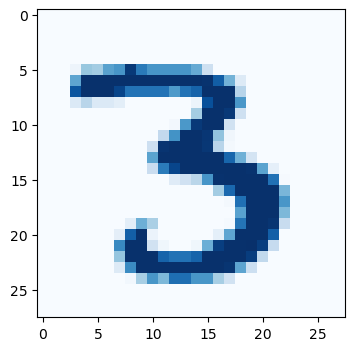

In [3]:
## we'll be using MNIST for our model
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
## making sure the data is in correct shape
input_shape = (28, 28, 1)
n_classes = 10
X_train, X_test = np.expand_dims(X_train, -1), np.expand_dims(X_test, -1)
## we also need our lables to be categories
y_train, y_test = keras.utils.to_categorical(y_train, n_classes), keras.utils.to_categorical(y_test, n_classes)

## showing a sample image
plt.figure(figsize=(4,4))
plt.imshow(X_train[12].squeeze(), cmap='Blues')

In [11]:
## the next step is to create the model
## we'll be using the sequential model
model = keras.Sequential([
    keras.Input(input_shape),
    keras.layers.Conv2D(32,kernel_size=(3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(.3),
    keras.layers.Dense(n_classes,activation='softmax')
])

## compiling the model
learning_rate = 1e-3
batch_size = 128
epochs = 20
model.compile(loss=keras.losses.CategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
             metrics=['accuracy'])
## fitting the model over a certain # of epochs
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=.2)
## and then evaluating the model
score = model.evaluate(X_test, y_test)
print(f'The loss is {score[0]} and the accuracy is {score[1]*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0511
The loss is 0.043404970318078995 and the accuracy is 98.89000058174133%
